In [77]:
import  pandas as pd
import sklearn

In [78]:

table5= pd.read_csv(r'taxi-price.csv')


In [79]:
#计算订单用时
table5['interval'] = (pd.to_datetime(table5['Etime']) -pd.to_datetime(table5['time'])).apply(lambda r:r.seconds)
table5['speed'] = (table5['distance']/table5['interval'])*3.6
table5 = table5[table5['speed']<80].copy()
table5['price_per_minutes'] = table5['price']/(table5['interval']/60)

In [80]:
table5

,orderid,taxi_id,time,lat,lon,isd,Etime,ELng,ELat,distance,interval,isnight,起步价,里程价,返空费,夜间附加费,候时费,price,speed,price_per_minutes
0,1.0,22224,2021-05-18 00:06:04,22.548750,114.031998,0,2021-05-18 00:20:19,114.020081,22.560667,3866.158570,855,True,16,4.478781,-0.00000,0.895756,0.280000,21.654537,16.278562,1.519617
1,2.0,22224,2021-05-18 00:20:35,22.560617,114.019218,0,2021-05-18 00:39:41,114.121536,22.581150,13666.665576,1146,True,16,27.999997,-0.00000,5.599999,0.200000,49.799997,42.931934,2.607330
2,3.0,22224,2021-05-18 00:41:32,22.581484,114.121002,0,2021-05-18 01:08:03,114.108047,22.566133,6255.412700,1591,True,16,10.212990,-0.00000,2.042598,0.360000,28.615589,14.154296,1.079155
3,4.0,22224,2021-05-18 01:08:18,22.566116,114.108002,0,2021-05-18 01:34:55,114.028633,22.559933,13523.532187,1597,True,16,27.656477,-0.00000,5.531295,0.400000,49.587773,30.485107,1.863035
4,5.0,22224,2021-05-18 01:35:11,22.559816,114.028580,0,2021-05-18 06:59:56,113.887032,22.547533,38487.652998,19485,True,16,87.570367,9.71111,17.514073,3.586667,134.382217,7.110883,0.413802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77681,96265.0,36947,2021-05-18 20:40:31,22.562599,114.060631,0,2021-05-18 21:01:19,113.986786,22.540216,9112.138458,1248,False,11,17.069132,-0.00000,0.000000,0.733333,28.802466,26.285015,1.384734
77682,96266.0,36947,2021-05-18 21:01:39,22.539383,113.986748,0,2021-05-18 21:17:29,113.962036,22.545750,3707.102340,950,False,11,4.097046,-0.00000,0.000000,1.466667,16.563712,14.047967,1.046129
77683,96267.0,36947,2021-05-18 21:17:39,22.545532,113.962067,0,2021-05-18 21:54:08,113.920586,22.530268,8805.960210,2189,False,11,16.334305,-0.00000,0.000000,2.933333,30.267638,14.482164,0.829629
77684,96269.0,36947,2021-05-18 22:06:32,22.531250,113.912468,0,2021-05-18 22:36:53,113.997284,22.545650,11354.732854,1821,False,11,22.451359,-0.00000,0.000000,2.933333,36.384692,22.447577,1.198837


In [81]:
table5.drop(index=table5[(table5.loc[:,'price']>400)].index,inplace=True)

In [82]:
df0 = pd.DataFrame(table5.groupby('taxi_id',as_index=False)['price'].sum())

In [83]:
df0

,taxi_id,price
0,22224,1238.156861
1,22228,1493.497395
2,22231,961.278354
3,22236,904.188903
4,22241,1138.755000
...,...,...
2313,36878,669.417640
2314,36886,1222.063839
2315,36899,1530.850336
2316,36920,1467.869021


In [84]:
df1= pd.DataFrame(table5.groupby('taxi_id',as_index=False)['distance'].sum())
df1['cost'] = (df1['distance']/1000)*0.75
df1

,taxi_id,distance,cost
0,22224,371309.178404,278.481884
1,22228,396224.394800,297.168296
2,22231,281954.205683,211.465654
3,22236,266981.994377,200.236496
4,22241,367469.932442,275.602449
...,...,...,...
2313,36878,222018.461261,166.513846
2314,36886,350145.769385,262.609327
2315,36899,425178.871084,318.884153
2316,36920,370814.369809,278.110777


In [85]:
#定义计算路径长度函数
from math import pi
import numpy as np

def getdistance(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    
    lon1, lat1, lon2, lat2 = map(lambda r:r*pi/180, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(a**0.5) 
    r = 6371 
    return c * r * 1000

In [86]:
df0['cost'] = (df1['distance']/1000)*0.75

In [87]:
df0

,taxi_id,price,cost
0,22224,1238.156861,278.481884
1,22228,1493.497395,297.168296
2,22231,961.278354,211.465654
3,22236,904.188903,200.236496
4,22241,1138.755000,275.602449
...,...,...,...
2313,36878,669.417640,166.513846
2314,36886,1222.063839,262.609327
2315,36899,1530.850336,318.884153
2316,36920,1467.869021,278.110777


In [88]:
df0['income']=df0['price']-df0['cost']
df0

,taxi_id,price,cost,income
0,22224,1238.156861,278.481884,959.674977
1,22228,1493.497395,297.168296,1196.329099
2,22231,961.278354,211.465654,749.812700
3,22236,904.188903,200.236496,703.952407
4,22241,1138.755000,275.602449,863.152551
...,...,...,...,...
2313,36878,669.417640,166.513846,502.903794
2314,36886,1222.063839,262.609327,959.454512
2315,36899,1530.850336,318.884153,1211.966183
2316,36920,1467.869021,278.110777,1189.758244


Text(0.5, 1.0, 'Histogram of income')

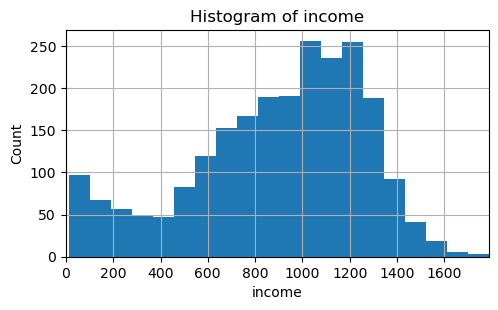

In [89]:
#用pandas自带hist绘制直方图
# 出租车一天的收益情况， 从收益中可以看出
import matplotlib.pyplot as plt
fig     = plt.figure(1,(12,3),dpi = 100)    
ax1      = plt.subplot(121)
plt.sca(ax1)
df0['income'].hist(ax = ax1,bins = 20)
plt.ylabel('Count')
plt.xlabel('income')
plt.xlim(0,df0['income'].quantile(1))
plt.title('Histogram of income')

#图是深圳司机的收入分布，可以看到日收入在1000到1200 的人员较多。从我们的数据集分析得出，出租车司机工薪比较高。如果单从收入方面考虑，做司机可以一试。

In [90]:
table5['Shour'] = pd.to_datetime(table5['time']).apply(lambda r:r.hour)
# 每小时订单数
df3 = table5.groupby(['Shour'])['taxi_id'].count().reset_index()
# 每小时平均订单价格
df2 = table5.groupby(['Shour'])['price_per_minutes'].mean().reset_index()
df3

,Shour,taxi_id
0,0,4584
1,1,2342
2,2,1707
3,3,1218
4,4,882
5,5,771
6,6,1279
7,7,2379
8,8,3840
9,9,3677


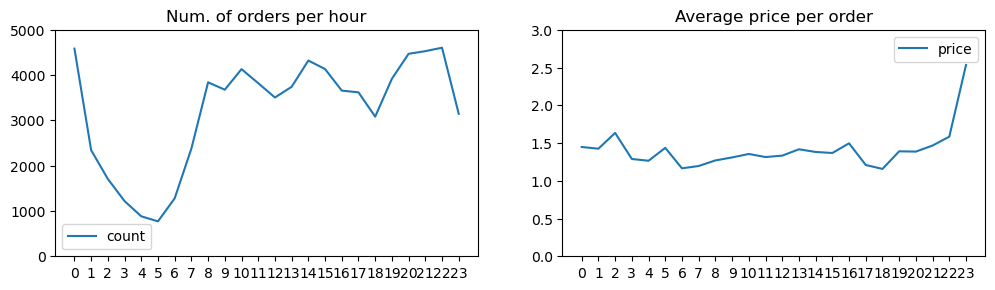

In [91]:
# 8点到12点的单子比较多
# 22点后的车费比较高
fig     = plt.figure(1,(12,3),dpi = 100)    
#什么时候接客订单多？什么时候接客单笔订单价格高
#创建一个子图
ax1      = plt.subplot(121)
plt.sca(ax1)

#绘制折线图
plt.plot(df3['Shour'],df3['taxi_id'],label = 'count')
plt.legend()
plt.title('Num. of orders per hour')
plt.xticks(range(24),df3['Shour'])
plt.ylim(0,5000)
#创建另一个子图
ax2      = plt.subplot(122)
plt.sca(ax2)

#绘制折线图
plt.plot(df3['Shour'],df2['price_per_minutes'],label = 'price')
plt.legend()
plt.title('Average price per order')
plt.xticks(range(24),df3['Shour'])
plt.ylim(0,3)
plt.show()
#每小时的订单量的展示图：结论是8点到22点的订单量比较多。可以到这时间段上班，没必要起早床，这样赚钱效率不高，还不如睡觉。
#每笔订单的价格图：结论是追求单笔高价格订单的可以选择22点到23点之间去。看司机属于喜欢多订单低价格方式还是低订单高价格方式

In [92]:
#收入最高的车手和收入中等的车手的挣钱方式的区别

highincome = df0[df0['income']>df0['income'].quantile(0.8)]['taxi_id']
print(len(highincome))
highincome

464


5       22242
18      22307
22      22317
23      22321
27      22345
        ...  
2299    36787
2300    36793
2310    36856
2312    36859
2315    36899
Name: taxi_id, Length: 464, dtype: int64

In [93]:
midincome = df0[(df0['income']>df0['income'].quantile(0.4))&(df0['income']<df0['income'].quantile(0.6))]['taxi_id']
len(midincome)

464

In [94]:
smallincome= df0[(df0['income']<df0['income'].quantile(0.2))]['taxi_id']
len(smallincome)

464

In [95]:
highincome_order = pd.merge(table5,highincome,on = 'taxi_id')
midincome_order = pd.merge(table5,midincome,on = 'taxi_id')
smallincome_order = pd.merge(table5,smallincome,on = 'taxi_id')


highincome_order.to_csv(r'highincome_order.csv',index = None)
midincome_order.to_csv(r'midincome_order.csv',index = None)
smallincome_order.to_csv(r'smallincome_order.csv',index = None)

In [96]:
highincome_order

,orderid,taxi_id,time,lat,lon,isd,Etime,ELng,ELat,distance,...,isnight,起步价,里程价,返空费,夜间附加费,候时费,price,speed,price_per_minutes,Shour
0,179.0,22242,2021-05-18 00:15:33,22.650642,114.009781,0,2021-05-18 23:16:20,114.041870,22.603216,38630.306848,...,True,16,87.912736,9.813821,17.582547,13.506667,144.815771,1.678626,0.104879,0
1,180.0,22242,2021-05-18 00:16:01,22.650581,114.009811,0,2021-05-18 01:45:36,114.121513,22.567055,20536.317434,...,True,16,44.487162,-0.000000,8.897432,1.386667,70.771261,13.754557,0.790005,0
2,181.0,22242,2021-05-18 01:45:39,22.567144,114.121613,0,2021-05-18 02:09:02,114.132225,22.565376,8326.728763,...,True,16,15.184149,-0.000000,3.036830,0.320000,34.540979,21.365804,1.477162,1
3,182.0,22242,2021-05-18 02:09:09,22.565453,114.132195,0,2021-05-18 03:37:23,114.092682,22.555117,17549.642653,...,True,16,37.319142,-0.000000,7.463828,0.306667,61.089638,11.934022,0.692365,2
4,183.0,22242,2021-05-18 03:37:49,22.555000,114.092644,0,2021-05-18 06:03:29,113.809052,22.627281,36288.342721,...,True,16,82.292023,8.127607,16.458405,1.786667,124.664700,14.947143,0.855822,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22816,96139.0,36899,2021-05-18 21:03:33,22.567533,114.125214,0,2021-05-18 21:24:59,114.137283,22.621099,9768.451574,...,False,11,18.644284,-0.000000,0.000000,0.800000,30.444284,27.345588,1.420418,21
22817,96140.0,36899,2021-05-18 21:25:06,22.621149,114.137383,0,2021-05-18 22:07:00,114.079483,22.536100,15703.845343,...,False,11,32.889229,-0.000000,0.000000,7.106667,50.995895,22.487607,1.217086,21
22818,96141.0,36899,2021-05-18 22:07:06,22.536100,114.079483,0,2021-05-18 22:33:25,114.102333,22.552549,6121.373629,...,False,11,9.891297,-0.000000,0.000000,5.866667,26.757963,13.956267,1.016769,22
22819,96142.0,36899,2021-05-18 22:33:32,22.552567,114.102417,0,2021-05-18 23:24:51,113.962685,22.547382,30801.829547,...,False,11,69.124391,0.000000,0.000000,2.933333,83.057724,36.013831,1.618533,22


In [110]:
highincome_money=highincome_order['price'].sum()/len(highincome_order)
highincome_money

34.07327798307587

In [109]:
lowincome_money=smallincome_order['price'].sum()/len(smallincome_order)
lowincome_money

38.57742437463463

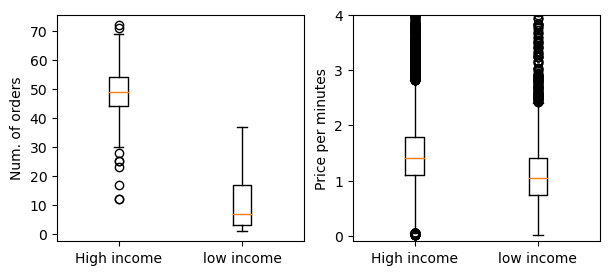

In [97]:
#高收入中收入群体每天的订单数量,  高收入群体主要是靠勤奋而赚钱的
import seaborn as sns
fig     = plt.figure(1,(7,3),dpi = 100)    
ax      = plt.subplot(121)
plt.sca(ax)
# plt.boxplot([highincome_order.groupby('taxi_id')['orderid'].count(),
# midincome_order.groupby('taxi_id')['orderid'].count()])

plt.boxplot([highincome_order.groupby('taxi_id')['orderid'].count(),
smallincome_order.groupby('taxi_id')['orderid'].count()])
plt.xticks([1,2],['High income','low income'])
plt.ylabel('Num. of orders')


#订单每分钟收入分布情况
  
ax= plt.subplot(122)
plt.sca(ax)
# plt.boxplot([highincome_order['price_per_minutes'],
# midincome_order['price_per_minutes']])

plt.boxplot([highincome_order['price_per_minutes'],
smallincome_order['price_per_minutes']])

plt.xticks([1,2],['High income','low income'])
plt.ylim(-0.1,4)
plt.ylabel('Price per minutes')
plt.show()
#高收入群体是前20%， 中等收入群体是40%到60%。低收入群体是最后的20%。可以观察收入高的司机是凭借接单的数目获胜。而不是每分钟赚钱的效率获胜

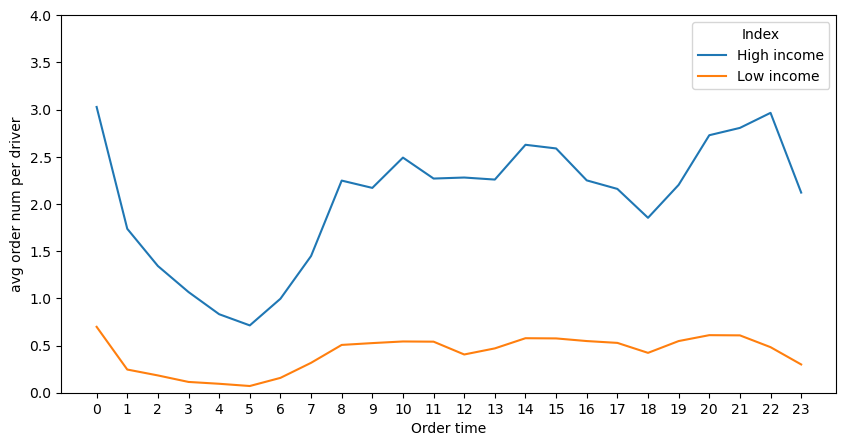

In [98]:
#统计高收入者和低收入者每小时平均的订单数量,差别不大才怪。 说明成功人士的努力程度也毫不逊色。
high_hour =  (highincome_order.groupby(pd.to_datetime(highincome_order['time']
                  ).apply(lambda r:r.hour))['price'].count()
/len(highincome)).reset_index().rename(columns = {'price':'avg_count'})
high_hour['Index'] = 'High income'



low_hour =  (smallincome_order.groupby(pd.to_datetime(smallincome_order['time']
                  ).apply(lambda r:r.hour))['price'].count()
/len(smallincome)).reset_index().rename(columns = {'price':'avg_count'})
low_hour['Index'] = 'Low income'
#绘图
fig     = plt.figure(1,(10,5),dpi = 100)    
ax      = plt.subplot(111)
plt.sca(ax)
sns.lineplot(x="time", y="avg_count",hue="Index", data=pd.concat([high_hour,low_hour]),ax = ax)
plt.ylabel('avg order num per driver')
plt.xlabel('Order time')
plt.ylim(0,4)
plt.xticks(range(24),range(24))
plt.show()
# 可以看出高收入司机群体无时无刻的单子数都要多。楷模典范

In [100]:
#计算出租车行驶的距离
#读取原始数据
data = pd.read_csv(r'sample_taxi.csv')


data = data.sort_values(by = ['taxi_id', 'time'])

#将时间字符串转换为pd的时间格式，后面可以轻松的做加减
data['time'] = pd.to_datetime(data['time'])



########清洗OpenStatus异常的数据#########
print('清洗OpenStatus异常的数据前',len(data))
data = data[-((data['is_passenger'].shift(-1) == data['is_passenger'].shift())&
(data['is_passenger'].shift(-1) != data['is_passenger'])&
(data['taxi_id'].shift(-1) == data['taxi_id'].shift())&
(data['taxi_id'].shift(-1) == data['taxi_id']))]
print('清洗OpenStatus异常的数据后',len(data))
#######################################

#定义计算路径长度
data['lon1'] = data['lon'].shift(-1)
data['lat1'] = data['lat'].shift(-1)
data['time1'] = data['time'].shift(-1)
data['taxi_id'] = data['taxi_id'].shift(-1)


#计算每个点与下一个点的距离
lon1 = data['lon']
lat1 = data['lat']
lon2 = data['lon1']
lat2 = data['lat1']
data['distance'] = getdistance(lon1, lat1, lon2, lat2)

#计算每个点与下一个点的时间差
data['interval'] = (data['time1']-data['time']).apply(lambda r:r.seconds)

#速度
data['speed'] = (data['distance']/data['interval'])*3.6

data = data[data['taxi_id'] == data['taxi_id']]

#计算每辆车的驾驶距离
disagg = data.groupby(['taxi_id'])['distance'].sum().reset_index()
disagg.head(5)
disagg

#小汽车每百公里大概在35-75元左右不等，我们统一定为每公里0.75元油费
disagg['cost'] = (disagg['distance']/1000)*0.75
disagg

清洗OpenStatus异常的数据前 9843421
清洗OpenStatus异常的数据后 9825212


,taxi_id,distance,cost
0,22224.0,471885.042524,353.913782
1,22228.0,530294.725281,397.721044
2,22231.0,546072.581893,409.554436
3,22236.0,301676.002672,226.257002
4,22240.0,3109.042075,2.331782
...,...,...,...
2995,36934.0,538403.703891,403.802778
2996,36936.0,415133.365065,311.350024
2997,36941.0,424744.270417,318.558203
2998,36946.0,441262.366927,330.946775


In [101]:
#计算每辆车的空驶距离和载客距离
disagg = data.groupby(['taxi_id','is_passenger'])['distance'].sum().reset_index()
disagg.head(5)

,taxi_id,is_passenger,distance
0,22224.0,0,86235.645202
1,22224.0,1,385649.397322
2,22228.0,0,99315.025879
3,22228.0,1,430979.699402
4,22231.0,0,203005.997854


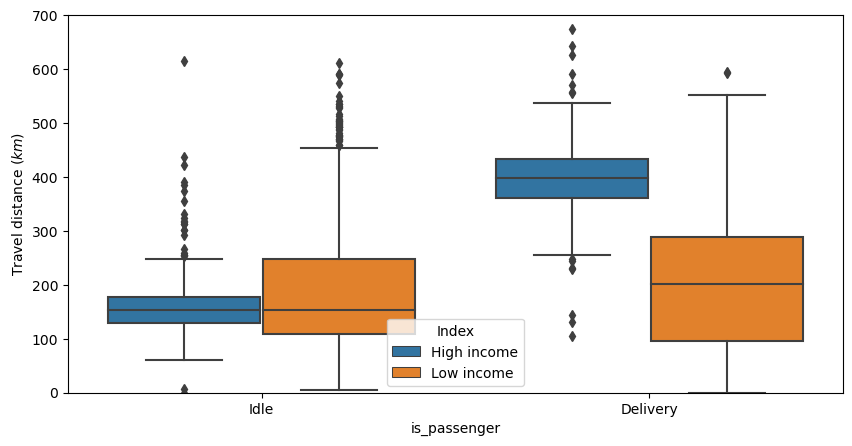

In [102]:
#整理数据到一个DataFrame中
highagg = pd.merge(highincome,disagg, on = 'taxi_id')
highagg['Index'] = 'High income'
highagg['distance'] = highagg['distance']/1000
midagg = pd.merge(midincome,disagg, on = 'taxi_id')
midagg['Index'] = 'Middle income'
midagg['distance'] = midagg['distance']/1000



lowagg = pd.merge(smallincome,disagg, on = 'taxi_id')
lowagg['Index'] = 'Low income'
lowagg['distance'] = lowagg['distance']/1000


#绘图
fig     = plt.figure(1,(10,5),dpi = 100)    
ax      = plt.subplot(111)
plt.sca(ax)
sns.boxplot(x="is_passenger", y="distance",hue="Index", data=pd.concat([highagg,lowagg])
,ax = ax)
plt.ylabel('Travel distance $(km)$')
plt.ylim(0,700)
plt.xticks([0,1],['Idle','Delivery'])
plt.show()

#空车走过的距离两个群体都不多。这点大家都差不多精致。
# 但是高收入群体载客走过的距离要相对多一些。来源可能来自于单子数目多或者单个客人行程远。总而言之，行驶距离更高。所以也是两个群体拉开的差距